<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-kamilla-jaroslav/blob/main/cyclegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# Укажите имя файла с расширением .zip
zip_file = "/content/processed_images (3).zip"  # Замените на имя вашего файла

# Укажите папку для распаковки
output_folder = "/content/processed_images (3)"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

print(f"Данные распакованы в папку: {output_folder}")

Данные распакованы в папку: /content/processed_images (3)


In [5]:
%%capture
!pip install torch torchvision matplotlib pytorch_ssim
!pip install torch --upgrade



In [9]:
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch

# Утилита для загрузки данных
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])
        image = (image - 0.5) * 2
        image = np.expand_dims(image, axis=0).astype(np.float32)

        if self.transform:
            image = self.transform(image)

        return torch.tensor(image)

# Параметры
simulation_dir = "/content/processed_images (3)/processed_images/processed_simulation_images_12"
experiment_dir = "/content/processed_images (3)/processed_images/processed_experiment_images_12"
test_ratio = 0.2
val_ratio = 0.2

# Получаем пути ко всем файлам
simulation_paths = [os.path.join(simulation_dir, f) for f in os.listdir(simulation_dir) if f.endswith(".npy")]
experiment_paths = [os.path.join(experiment_dir, f) for f in os.listdir(experiment_dir) if f.endswith(".npy")]

# Разделение симуляций на обучающую, валидационную и тестовую выборки
sim_train, sim_test = train_test_split(simulation_paths, test_size=test_ratio, random_state=42)
sim_train, sim_val = train_test_split(sim_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Разделение экспериментов на обучающую, валидационную и тестовую выборки
exp_train, exp_test = train_test_split(experiment_paths, test_size=test_ratio, random_state=42)
exp_train, exp_val = train_test_split(exp_train, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Создание датасетов
sim_train_dataset = ImageDataset(sim_train)
sim_val_dataset = ImageDataset(sim_val)
sim_test_dataset = ImageDataset(sim_test)

exp_train_dataset = ImageDataset(exp_train)
exp_val_dataset = ImageDataset(exp_val)
exp_test_dataset = ImageDataset(exp_test)

# Создание DataLoader для батчевой обработки
sim_train_loader = DataLoader(sim_train_dataset, batch_size=16, shuffle=True)
sim_val_loader = DataLoader(sim_val_dataset, batch_size=16, shuffle=False)
sim_test_loader = DataLoader(sim_test_dataset, batch_size=16, shuffle=False)

exp_train_loader = DataLoader(exp_train_dataset, batch_size=16, shuffle=True)
exp_val_loader = DataLoader(exp_val_dataset, batch_size=16, shuffle=False)
exp_test_loader = DataLoader(exp_test_dataset, batch_size=16, shuffle=False)

# Проверка
print(f"Simulation train size: {len(sim_train_dataset)}")
print(f"Simulation val size: {len(sim_val_dataset)}")
print(f"Simulation test size: {len(sim_test_dataset)}")
print(f"Experiment train size: {len(exp_train_dataset)}")
print(f"Experiment val size: {len(exp_val_dataset)}")
print(f"Experiment test size: {len(exp_test_dataset)}")


Simulation train size: 1592
Simulation val size: 531
Simulation test size: 531
Experiment train size: 1500
Experiment val size: 500
Experiment test size: 500


Epoch [1/101], Generator Loss: 8.57819652557373, Discriminator Loss: 0.0018717607017606497
Weights saved for epoch 0


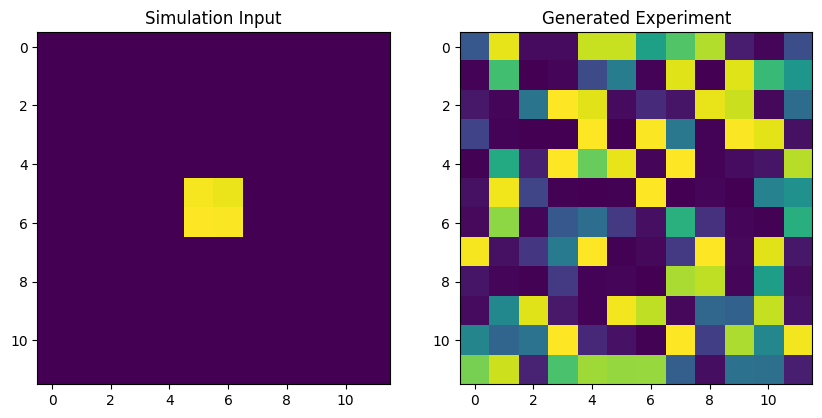

Epoch [2/101], Generator Loss: 7.333625793457031, Discriminator Loss: 0.0024404642172157764
Epoch [3/101], Generator Loss: 7.129840850830078, Discriminator Loss: 0.0030227191746234894
Epoch [4/101], Generator Loss: 5.389751434326172, Discriminator Loss: 0.0010294988751411438
Epoch [5/101], Generator Loss: 5.065803527832031, Discriminator Loss: 0.003073069266974926
Epoch [6/101], Generator Loss: 4.492787837982178, Discriminator Loss: 0.0005317941540852189
Epoch [7/101], Generator Loss: 4.335764408111572, Discriminator Loss: 0.0007495484896935523
Epoch [8/101], Generator Loss: 4.282727241516113, Discriminator Loss: 0.0013234538491815329
Epoch [9/101], Generator Loss: 4.4153032302856445, Discriminator Loss: 0.0006278617074713111
Epoch [10/101], Generator Loss: 4.384061813354492, Discriminator Loss: 0.0013569347793236375
Epoch [11/101], Generator Loss: 4.5484299659729, Discriminator Loss: 0.0018406171584501863
Weights saved for epoch 10


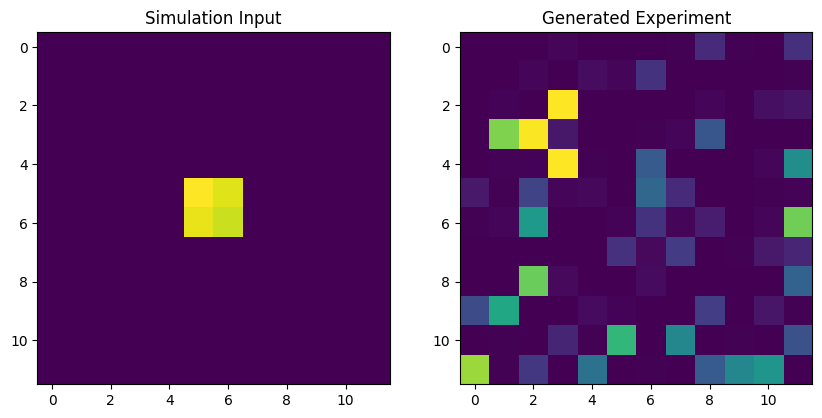

Epoch [12/101], Generator Loss: 4.042974472045898, Discriminator Loss: 0.00020880240481346846
Epoch [13/101], Generator Loss: 0.6576194167137146, Discriminator Loss: 0.24761199951171875
Epoch [14/101], Generator Loss: 0.6574721932411194, Discriminator Loss: 0.25405415892601013
Epoch [15/101], Generator Loss: 0.6286432147026062, Discriminator Loss: 0.2531736493110657
Epoch [16/101], Generator Loss: 0.6112213730812073, Discriminator Loss: 0.2813173234462738
Epoch [17/101], Generator Loss: 0.5951400995254517, Discriminator Loss: 0.23386266827583313
Epoch [18/101], Generator Loss: 0.8839369416236877, Discriminator Loss: 0.17355647683143616
Epoch [19/101], Generator Loss: 0.588740348815918, Discriminator Loss: 0.24087616801261902
Epoch [20/101], Generator Loss: 0.640694797039032, Discriminator Loss: 0.2503635883331299
Epoch [21/101], Generator Loss: 1.0278241634368896, Discriminator Loss: 0.1356380730867386
Weights saved for epoch 20


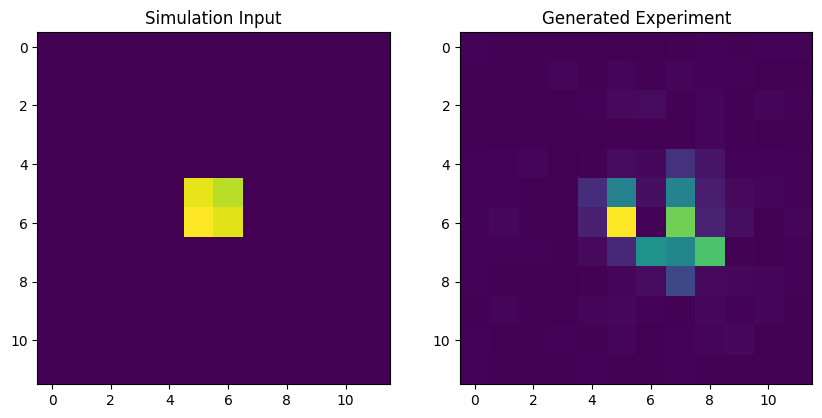

Epoch [22/101], Generator Loss: 0.8857873678207397, Discriminator Loss: 0.22312620282173157
Epoch [23/101], Generator Loss: 0.6278082728385925, Discriminator Loss: 0.2133927345275879
Epoch [24/101], Generator Loss: 0.9904592037200928, Discriminator Loss: 0.2005089819431305
Epoch [25/101], Generator Loss: 0.9346038699150085, Discriminator Loss: 0.22869017720222473
Epoch [26/101], Generator Loss: 1.0467009544372559, Discriminator Loss: 0.20117545127868652
Epoch [27/101], Generator Loss: 1.0730897188186646, Discriminator Loss: 0.2676902711391449
Epoch [28/101], Generator Loss: 0.9477798342704773, Discriminator Loss: 0.220105841755867
Epoch [29/101], Generator Loss: 0.7940328121185303, Discriminator Loss: 0.19920867681503296
Epoch [30/101], Generator Loss: 0.7026480436325073, Discriminator Loss: 0.2402321696281433
Epoch [31/101], Generator Loss: 0.6028286814689636, Discriminator Loss: 0.2689509093761444
Weights saved for epoch 30


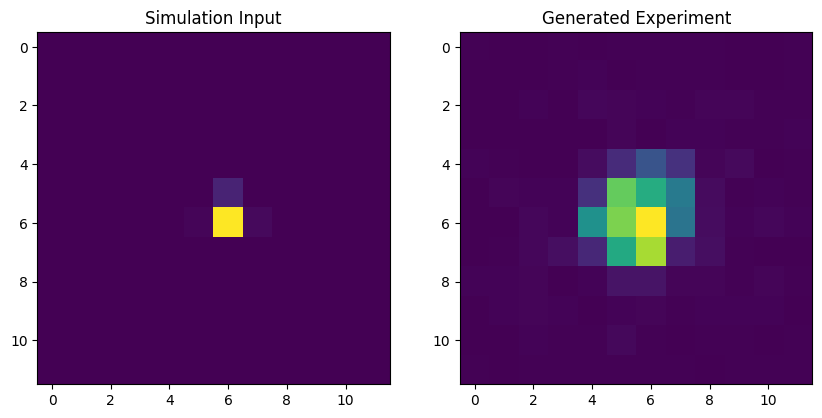

Epoch [32/101], Generator Loss: 0.5870596170425415, Discriminator Loss: 0.2499311864376068
Epoch [33/101], Generator Loss: 0.6838288307189941, Discriminator Loss: 0.2682371735572815
Epoch [34/101], Generator Loss: 0.693142294883728, Discriminator Loss: 0.25561898946762085
Epoch [35/101], Generator Loss: 0.513965368270874, Discriminator Loss: 0.26937395334243774
Epoch [36/101], Generator Loss: 0.6517200469970703, Discriminator Loss: 0.24540716409683228
Epoch [37/101], Generator Loss: 0.571365475654602, Discriminator Loss: 0.2615581750869751
Epoch [38/101], Generator Loss: 0.5149087309837341, Discriminator Loss: 0.24825379252433777
Epoch [39/101], Generator Loss: 0.6878454685211182, Discriminator Loss: 0.21789692342281342
Epoch [40/101], Generator Loss: 0.8161790370941162, Discriminator Loss: 0.25983700156211853
Epoch [41/101], Generator Loss: 0.7025701403617859, Discriminator Loss: 0.234741672873497
Weights saved for epoch 40


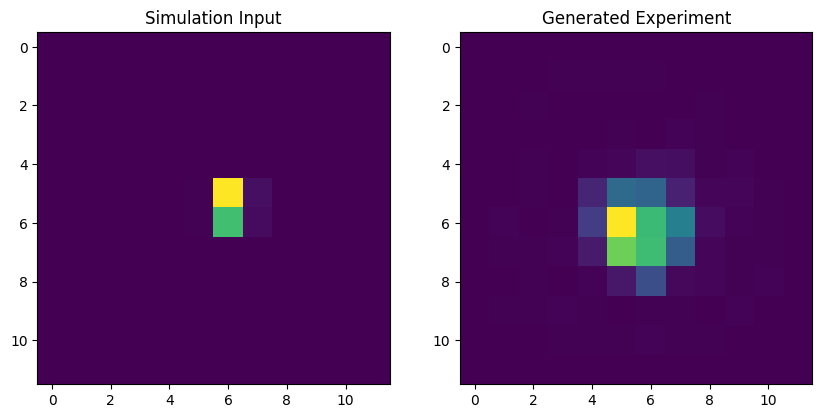

Epoch [42/101], Generator Loss: 0.5151426792144775, Discriminator Loss: 0.24652323126792908
Epoch [43/101], Generator Loss: 0.48045623302459717, Discriminator Loss: 0.23645436763763428
Epoch [44/101], Generator Loss: 0.43703579902648926, Discriminator Loss: 0.26557451486587524
Epoch [45/101], Generator Loss: 0.42190811038017273, Discriminator Loss: 0.2363377809524536
Epoch [46/101], Generator Loss: 0.6182265877723694, Discriminator Loss: 0.2475050985813141
Epoch [47/101], Generator Loss: 0.5436024069786072, Discriminator Loss: 0.2564431428909302
Epoch [48/101], Generator Loss: 0.6410308480262756, Discriminator Loss: 0.22665134072303772
Epoch [49/101], Generator Loss: 0.7692330479621887, Discriminator Loss: 0.2380460798740387
Epoch [50/101], Generator Loss: 0.4524550437927246, Discriminator Loss: 0.2458016276359558
Epoch [51/101], Generator Loss: 0.5910859107971191, Discriminator Loss: 0.24264925718307495
Weights saved for epoch 50


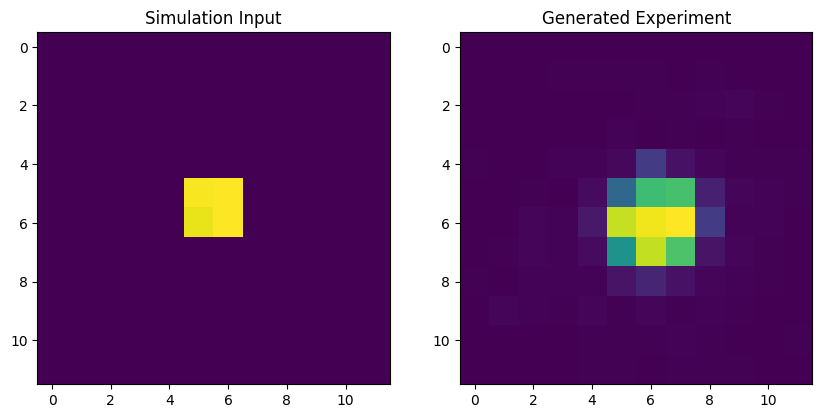

Epoch [52/101], Generator Loss: 0.41900575160980225, Discriminator Loss: 0.3046497702598572
Epoch [53/101], Generator Loss: 0.9229100346565247, Discriminator Loss: 0.25741058588027954
Epoch [54/101], Generator Loss: 0.6471778154373169, Discriminator Loss: 0.24195854365825653
Epoch [55/101], Generator Loss: 0.8930622339248657, Discriminator Loss: 0.21143105626106262
Epoch [56/101], Generator Loss: 0.6905351281166077, Discriminator Loss: 0.2357395738363266
Epoch [57/101], Generator Loss: 0.7857760190963745, Discriminator Loss: 0.24163304269313812
Epoch [58/101], Generator Loss: 0.7777144312858582, Discriminator Loss: 0.2410900890827179
Epoch [59/101], Generator Loss: 0.769048273563385, Discriminator Loss: 0.24059997498989105
Epoch [60/101], Generator Loss: 0.5688256025314331, Discriminator Loss: 0.24478361010551453
Epoch [61/101], Generator Loss: 0.6531262397766113, Discriminator Loss: 0.23653079569339752
Weights saved for epoch 60


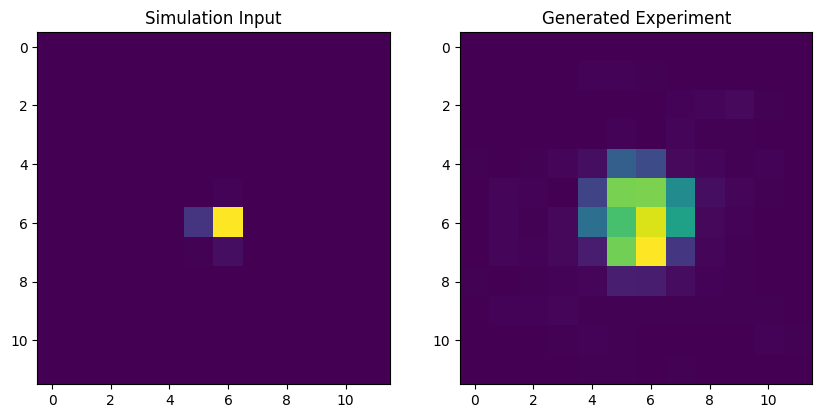

Epoch [62/101], Generator Loss: 0.5973682999610901, Discriminator Loss: 0.23517507314682007
Epoch [63/101], Generator Loss: 0.5496556758880615, Discriminator Loss: 0.2420833706855774
Epoch [64/101], Generator Loss: 0.5159087777137756, Discriminator Loss: 0.25173741579055786
Epoch [65/101], Generator Loss: 0.5052543878555298, Discriminator Loss: 0.26050442457199097
Epoch [66/101], Generator Loss: 0.5937947034835815, Discriminator Loss: 0.23331476747989655
Epoch [67/101], Generator Loss: 0.6023879647254944, Discriminator Loss: 0.216226726770401
Epoch [68/101], Generator Loss: 0.6598265767097473, Discriminator Loss: 0.2351735681295395
Epoch [69/101], Generator Loss: 0.6844122409820557, Discriminator Loss: 0.18641072511672974
Epoch [70/101], Generator Loss: 1.0932729244232178, Discriminator Loss: 0.2195122390985489
Epoch [71/101], Generator Loss: 0.7743920087814331, Discriminator Loss: 0.21508528292179108
Weights saved for epoch 70


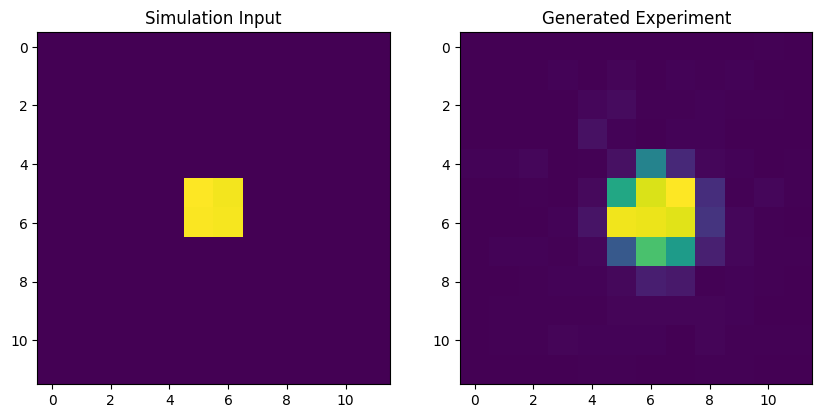

Epoch [72/101], Generator Loss: 0.5740270614624023, Discriminator Loss: 0.2403601109981537
Epoch [73/101], Generator Loss: 0.5170913934707642, Discriminator Loss: 0.2731817364692688
Epoch [74/101], Generator Loss: 1.2338824272155762, Discriminator Loss: 0.18455886840820312
Epoch [75/101], Generator Loss: 0.6026557683944702, Discriminator Loss: 0.23143243789672852
Epoch [76/101], Generator Loss: 0.8323459625244141, Discriminator Loss: 0.20931968092918396
Epoch [77/101], Generator Loss: 0.7230758666992188, Discriminator Loss: 0.26217228174209595
Epoch [78/101], Generator Loss: 0.5400221943855286, Discriminator Loss: 0.23837554454803467
Epoch [79/101], Generator Loss: 1.1510287523269653, Discriminator Loss: 0.18489079177379608
Epoch [80/101], Generator Loss: 0.7836413979530334, Discriminator Loss: 0.1831350028514862
Epoch [81/101], Generator Loss: 0.42103177309036255, Discriminator Loss: 0.25414758920669556
Weights saved for epoch 80


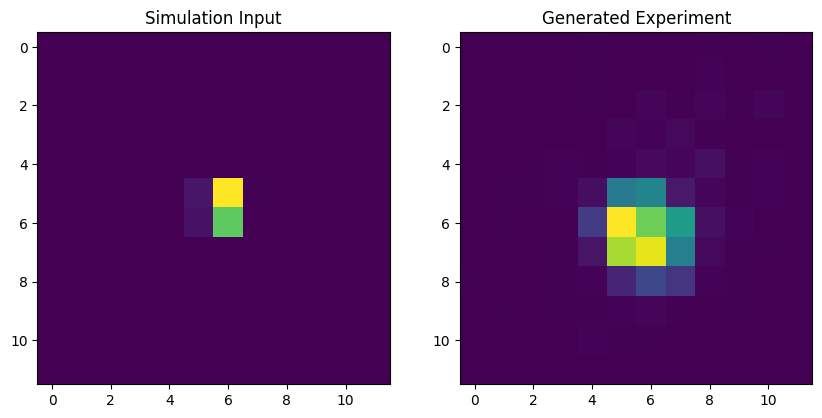

Epoch [82/101], Generator Loss: 0.909091055393219, Discriminator Loss: 0.17009472846984863
Epoch [83/101], Generator Loss: 1.0626415014266968, Discriminator Loss: 0.1606365591287613
Epoch [84/101], Generator Loss: 0.8566436767578125, Discriminator Loss: 0.17068344354629517
Epoch [85/101], Generator Loss: 0.5422924757003784, Discriminator Loss: 0.23574374616146088
Epoch [86/101], Generator Loss: 0.6701177358627319, Discriminator Loss: 0.2064528465270996
Epoch [87/101], Generator Loss: 0.5134375095367432, Discriminator Loss: 0.2382003366947174
Epoch [88/101], Generator Loss: 0.5678807497024536, Discriminator Loss: 0.2836933434009552
Epoch [89/101], Generator Loss: 0.8669765591621399, Discriminator Loss: 0.24533680081367493
Epoch [90/101], Generator Loss: 0.7681812047958374, Discriminator Loss: 0.18246155977249146
Epoch [91/101], Generator Loss: 0.6625411510467529, Discriminator Loss: 0.2083999216556549
Weights saved for epoch 90


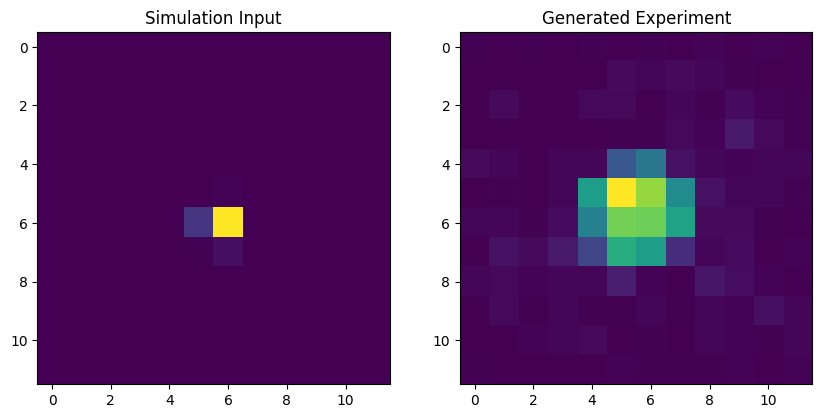

Epoch [92/101], Generator Loss: 0.4586142599582672, Discriminator Loss: 0.2553272247314453
Epoch [93/101], Generator Loss: 0.5697210431098938, Discriminator Loss: 0.21030864119529724
Epoch [94/101], Generator Loss: 0.6541755795478821, Discriminator Loss: 0.21558471024036407
Epoch [95/101], Generator Loss: 0.9860336780548096, Discriminator Loss: 0.1561715006828308
Epoch [96/101], Generator Loss: 0.9635685086250305, Discriminator Loss: 0.20746636390686035
Epoch [97/101], Generator Loss: 0.6221559643745422, Discriminator Loss: 0.2212945520877838
Epoch [98/101], Generator Loss: 0.6242086887359619, Discriminator Loss: 0.21956220269203186
Epoch [99/101], Generator Loss: 0.6335828304290771, Discriminator Loss: 0.23160168528556824
Epoch [100/101], Generator Loss: 0.5934567451477051, Discriminator Loss: 0.2750380039215088
Epoch [101/101], Generator Loss: 0.9773654341697693, Discriminator Loss: 0.2025795876979828
Weights saved for epoch 100


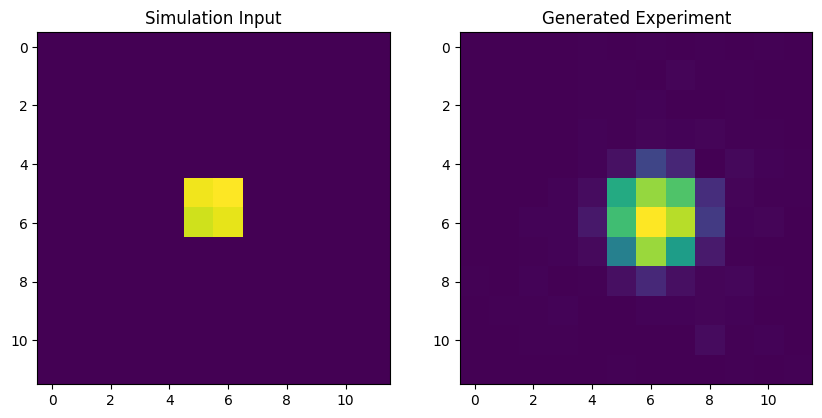

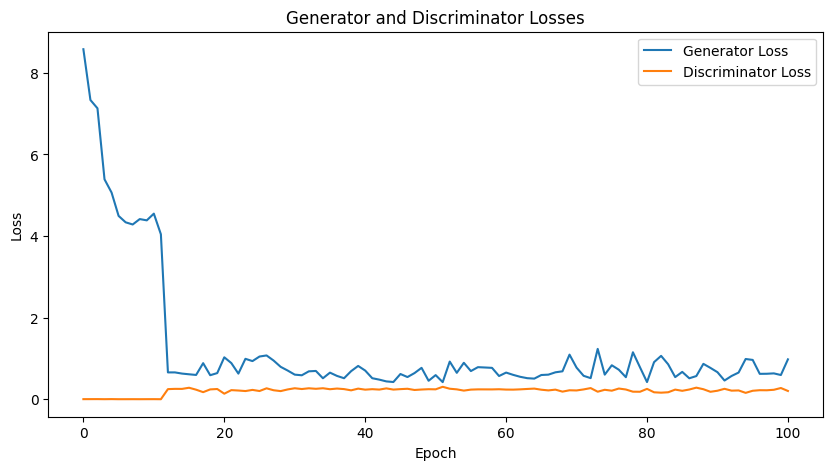

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Модель дискриминатора
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 1, kernel_size=4, stride=1, padding=1)
        )

    def forward(self, x):
        return self.model(x)

# Функция для расчета циклической потери
def cycle_loss(real, reconstructed):
    if real.size() != reconstructed.size():
        reconstructed = F.interpolate(reconstructed, size=real.size()[2:], mode='bilinear', align_corners=False)
    return torch.mean(torch.abs(real - reconstructed))

# Инициализация моделей
gen = Generator().cuda()
disc = Discriminator().cuda()

# Оптимизаторы
gen_optimizer = optim.Adam(gen.parameters(), lr=0.0001, betas=(0.5, 0.999))
disc_optimizer = optim.Adam(disc.parameters(), lr=0.0001, betas=(0.5, 0.999))

checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Списки для хранения значений потерь
gen_losses = []
disc_losses = []

# Обучение
epochs = 101
for epoch in range(epochs):
    for sim_images, exp_images in zip(sim_train_loader, exp_train_dataloader):
        sim_images, exp_images = sim_images.cuda(), exp_images.cuda()

        # Генерация
        fake_exp = gen(sim_images)
        fake_sim = gen(exp_images)

        # Обучение дискриминаторов
        disc_optimizer.zero_grad()
        real_loss_exp = torch.mean((disc(exp_images) - 1) ** 2)
        fake_loss_exp = torch.mean(disc(fake_exp) ** 2)
        disc_loss_exp = (real_loss_exp + fake_loss_exp) / 2

        real_loss_sim = torch.mean((disc(sim_images) - 1) ** 2)
        fake_loss_sim = torch.mean(disc(fake_sim) ** 2)
        disc_loss_sim = (real_loss_sim + fake_loss_sim) / 2

        disc_loss = (disc_loss_exp + disc_loss_sim) / 2
        disc_loss.backward(retain_graph=True)
        disc_optimizer.step()

        # Обучение генераторов
        gen_optimizer.zero_grad()
        gen_loss_exp = torch.mean((disc(fake_exp) - 1) ** 2)
        gen_loss_sim = torch.mean((disc(fake_sim) - 1) ** 2)

        cycle_loss_exp = cycle_loss(exp_images, gen(fake_sim))
        cycle_loss_sim = cycle_loss(sim_images, gen(fake_exp))

        gen_loss = gen_loss_exp + gen_loss_sim + 10 * (cycle_loss_exp + cycle_loss_sim)
        gen_loss.backward()
        gen_optimizer.step()

    # Сохраняем потери
    gen_losses.append(gen_loss.item())
    disc_losses.append(disc_loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Generator Loss: {gen_loss.item()}, Discriminator Loss: {disc_loss.item()}")

    # Сохранение промежуточных результатов каждые 10 эпох
    if epoch % 10 == 0:
        torch.save(gen.state_dict(), f"{checkpoint_dir}/generator_epoch_{epoch}.pth")
        torch.save(disc.state_dict(), f"{checkpoint_dir}/discriminator_epoch_{epoch}.pth")
        print(f"Weights saved for epoch {epoch}")

        # Визуализация результатов
        with torch.no_grad():
            example_sim = sim_images[0:1]
            example_generated = gen(example_sim)[0]
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Simulation Input")
            plt.imshow(example_sim[0].cpu().numpy().squeeze(), cmap="viridis")
            plt.subplot(1, 2, 2)
            plt.title("Generated Experiment")
            plt.imshow(example_generated.cpu().numpy().squeeze(), cmap="viridis")
            plt.show()

# Визуализация графиков потерь
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Losses')
plt.show()
